# SECTION B – Machine Learning

This dataset, each entry represents a person who takes a credit by a bank. Each person is
classified as good or bad credit risks according to the set of attributes.
The description of data are as follows:
Age- age
Sex - male or female
Job - 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled
Housing - own, rent, or free
Saving accounts - little, moderate, quite rich, rich
Checking account - in DM - Deutsch Mark
Credit amount - DM
Duration - month
Purpose - car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business,
vacation/others
Risk - The target variable:Good or Bad Risk

Objective
Based on the given features, classify the person as a good risk or bad risk.
Guidelines
1. Explore and prepare the data
2. Create training and testing data for the model
3. Train and test the model using any three or more classification algorithms and compare
accuracies between all.
4. Show or visualize the output.

**Task 2: Credit risk modelling**

In [0]:
# import packages 
import pandas as pd                                            # package to manipulate dataframe
import numpy as np                                             # scientific computing package
import seaborn as sns                                          #  visualization
from matplotlib import pyplot as plt                           #  visualization
from sklearn.model_selection import train_test_split           # splitting the data into train and test
from sklearn.linear_model import LogisticRegression            # Building the Logistic Regression model
from sklearn.ensemble import RandomForestClassifier            # Building the Random Forest Regression model
from sklearn.model_selection import GridSearchCV               # perform Grid search to build Random forets model
from sklearn import metrics                                    # Metrics to evalaute the model
from sklearn.metrics import roc_curve, auc                     # Metrics to evalaute the model



In [0]:
# upload data
url = 'https://raw.githubusercontent.com/shivckr/border/master/german_credit_data.csv'
credit_risk_data= pd.read_csv(url, index_col = 0)

In [0]:
#data Preview
credit_risk_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [0]:
# data statistics
credit_risk_data.describe()

,Age,Job,Credit amount,Duration
count,522.000000,522.000000,522.000000,522.000000
mean,34.888889,1.875479,3278.745211,21.339080
std,11.787918,0.682811,2929.155177,12.474079
min,19.000000,0.000000,276.000000,6.000000
25%,26.000000,2.000000,1297.500000,12.000000
50%,31.500000,2.000000,2326.500000,18.000000
75%,41.000000,2.000000,3971.250000,26.750000
max,75.000000,3.000000,18424.000000,72.000000


In [0]:
# shape of dataset
credit_risk_data.shape

(1000, 11)

In [0]:
# list of columns in dataset
list(credit_risk_data.columns)

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

In [0]:
#datatypes in  dataset
credit_risk_data.info()

In [0]:
#missing value in  data
credit_risk_data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [0]:

credit_risk_data.groupby('Checking account').count()

In [0]:
#dropping the missing value
credit_risk_data.dropna(axis=0, inplace= True)
# shape of dataset
# credit_risk_data.shape
# credit_risk_data.isnull().sum()

In [0]:
#Correlation heatmap
sns.heatmap(credit_risk_data.corr(), annot= True)

In [0]:
credit_risk_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [0]:
#creating one hot encoding for categorical feature
categorical_features = ['Sex','Housing','Saving accounts', 'Checking account', 'Purpose', 'Risk']

Sex_dummy = pd.get_dummies(credit_risk_data['Sex'],drop_first=True, prefix='Sex')

Housing_dummy = pd.get_dummies(credit_risk_data['Housing'],drop_first=True, prefix='Housing')
Saving_accounts_dummy = pd.get_dummies(credit_risk_data['Saving accounts'],drop_first=True,prefix='Saving accounts')
Checking_account_dummy = pd.get_dummies(credit_risk_data['Checking account'],drop_first=True,prefix = 'Checking account')
Purpose_dummy = pd.get_dummies(credit_risk_data['Purpose'],drop_first=True, prefix='Purpose')
Risk_dummy = pd.get_dummies(credit_risk_data['Risk'],drop_first=True, prefix='Risk')

In [0]:
# merge all dummified categorical columns
credit_risk_data= pd.concat([credit_risk_data,Housing_dummy,Sex_dummy,Saving_accounts_dummy,Checking_account_dummy,Purpose_dummy,Risk_dummy],1)

In [0]:
credit_risk_data.head()

,Age,Job,Credit amount,Duration,Housing_own,Housing_rent,Sex_male,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
1,22,2,5951,48,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,45,2,7882,42,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7,35,3,6948,36,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1
9,28,3,5234,30,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0


In [0]:

#delete all non dummified columns
#credit_risk_data =credit_risk_data.drop(['Sex','Housing','Saving accounts', 'Checking account', 'Purpose', 'Risk'],axis = 1)


In [0]:
credit_risk_data.shape

(522, 20)

In [0]:
# prepare data 
X = credit_risk_data.drop(['Risk_good'],axis=1)
y = credit_risk_data.Risk_good

In [0]:
# checking data 
y.value_counts()


1    291
0    231
Name: Risk_good, dtype: int64

In [0]:
# Train test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [0]:
# train a logistic regression model on the training set

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [0]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
# calculate accuracy with threshold of 0.5
print(metrics.accuracy_score(y_test, y_pred_class))

In [0]:
# calculate null accuracy 
pd.Series(y_test).value_counts().head(1) / len(y_test)

In [0]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[37 42]
 [31 63]]


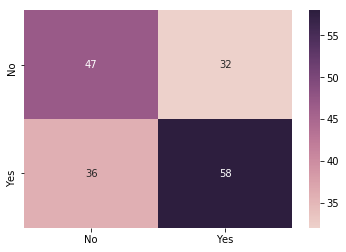

In [0]:
# Visualizing the confusion matrix

cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [0]:
predict_probabilities = logreg.predict_proba(X_test)          # Predict the probability values for X_test
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

In [0]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.658632


# Random forest approch 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1, 'random_state': 123}
Accuracy: 0.5895953757225434
Confusion Metrix:
 [[45 37]
 [34 57]]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


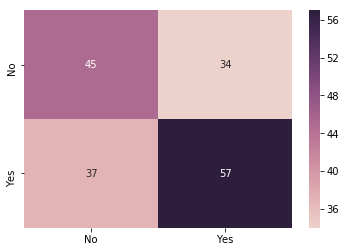

In [0]:
#making  instance
model=RandomForestClassifier()

#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[1,3,5],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[2,3,4,5], 
          'random_state':[123],
          }

#Making models with hyper parameters sets
modelA = GridSearchCV(model, param_grid=params )


# Train test Split 
#X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

#learning 
modelA.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",modelA.best_params_)

#Prediction
prediction=modelA.predict(X_test)


#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

# Visualizing the confusion matrix
conf=metrics.confusion_matrix(y_test, prediction)


cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")
